# Исследование надежности заемщиков

Задачей данного исследования явлется анализ имеющихся данных с помощью сводных таблиц и выявление факторов, которые могут повлиять на появление просрочки по кредиту.

## Откроем таблицу и изучим основную информацию о данных

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('datasets/data.csv')

In [3]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

Выведем количество пропущенных значений для каждого столбца.

In [5]:
print(data.isna().sum())

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


Заменим пропущенные значения столбца `total_income` медианными значениями по каждому типу из столбца `income_type`.

In [6]:
for income in data['income_type'].unique():
    data.loc[(data['income_type'] == income) & (data['total_income'].isna()), 'total_income'] = data.loc[data['income_type'] == income, 'total_income'].median()  

### Обработка аномальных значений

Заменим все отрицательные значения трудового стажа в столбце `days_employed`.

In [7]:
data['days_employed'] = abs(data['days_employed'])

Для каждого типа занятости покажем медианное значение трудового стажа `days_employed`.

In [8]:
print(data.groupby('income_type')['days_employed'].median())

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64


У двух типов (безработные и пенсионеры) получатся аномально большие значения. Причина таких значений не понятна, поэтому оставим её пока без изменений.

Выведем перечень уникальных значений столбца `children`.

In [9]:
print(data['children'].unique())

[ 1  0  3  2 -1  4 20  5]


Удалите строки, в которых встречаются аномальные значения.

In [10]:
children_artifacts = [-1, 20]
for artifact in children_artifacts:
    data = data.drop(data[data['children'] == artifact].index)

Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.

In [11]:
print(data['children'].unique())

[1 0 3 2 4 5]


Заполним пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`.

In [12]:
for income in data['income_type'].unique():
    data.loc[(data['income_type'] == income) & (data['days_employed'].isna()), 'days_employed'] = data.loc[data['income_type'] == income, 'days_employed'].median()  

Убедимся, что все пропуски заполнены.

In [13]:
print(data.isna().sum())

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный.

In [14]:
data['total_income'] = data['total_income'].astype('int')

### Обработка дубликатов

In [15]:
data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Обработаеv неявные дубликаты в столбце `education`, приведём их к нижнему регистру.

In [16]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [17]:
data.duplicated().sum()

71

In [18]:
data = data.drop_duplicates(keep='first')

### Категоризация данных

На основании заданных диапазонов создадим в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [19]:
def categorize_income(income):
    if income > 1000000:
        return 'A'
    elif income > 200000:
        return 'B'
    elif income > 50000:
        return 'C'
    elif income > 30000:
        return 'D'
    else:
        return 'E'

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.

In [21]:
print(data['purpose'].unique())

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [22]:
def categorize_purpose(purpose):
    if 'автомобил' in purpose:
        return 'операции с автомобилем'
    elif 'жиль' in purpose or 'недвижим' in purpose:
        return 'операции с недвижимостью'
    elif 'свадьб' in purpose:
        return 'проведение свадьбы'
    elif 'образован' in purpose:
        return 'получение образования'
    else:
        return 'без категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

In [24]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


### Исследование  данных и поиск ответов а вопросы.

#### Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [25]:
def make_pivot_debt(criteria, data):
    debt_pivot = data.pivot_table(index=criteria, values='debt', aggfunc={'count', 'sum', 'mean'})
    debt_pivot['sum'] = debt_pivot['sum'].astype('int')
    debt_pivot['count'] = debt_pivot['count'].astype('int')
    debt_pivot = debt_pivot.rename(columns={'count':'Кол-во заёмщиков', 'sum': 'Кол-во должников', 'mean': 'Доля должников'})
    return debt_pivot

def graph_pivot_debt(criteria, data):
    debt_pivot = make_pivot_debt(criteria, data)
    debt_pivot['Доля должников'].plot(kind='bar')
    return

In [26]:
make_pivot_debt('children', data)

,Кол-во заёмщиков,Доля должников,Кол-во должников
children,,,
0,14091,0.075438,1063
1,4808,0.092346,444
2,2052,0.094542,194
3,330,0.081818,27
4,41,0.097561,4
5,9,0.000000,0


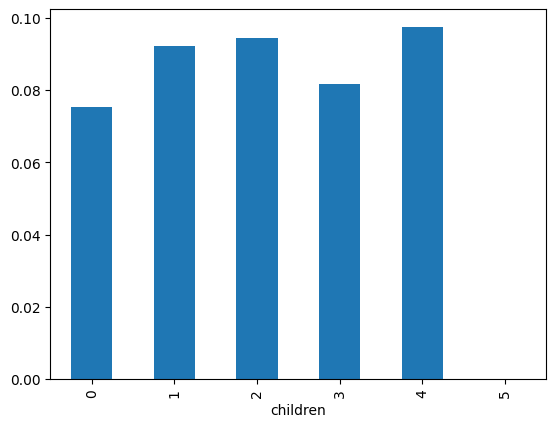

In [27]:
graph_pivot_debt('children', data)

**Вывод:** 
График показывает, что чем больше у кредиторов детей, тем чаще они чаще они нарушают срок возврата кредита.
Данные по клиентам с пятью детьми не показательны в виду их малого количества.

#### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [28]:
make_pivot_debt('family_status', data)

,Кол-во заёмщиков,Доля должников,Кол-во должников
family_status,,,
Не женат / не замужем,2796,0.097639,273
в разводе,1189,0.070648,84
вдовец / вдова,951,0.066246,63
гражданский брак,4134,0.093130,385
женат / замужем,12261,0.075606,927


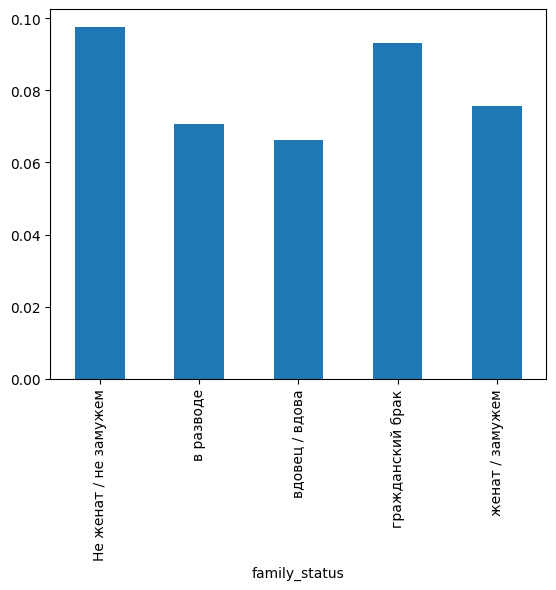

In [29]:
graph_pivot_debt('family_status', data)

**Вывод:** клиенты с официально зарегистрированным семейным положением чаще выплачивают кредиты в срок.

#### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [30]:
make_pivot_debt('total_income_category', data)

,Кол-во заёмщиков,Доля должников,Кол-во должников
total_income_category,,,
A,25,0.080000,2
B,5014,0.070602,354
C,15921,0.084982,1353
D,349,0.060172,21
E,22,0.090909,2


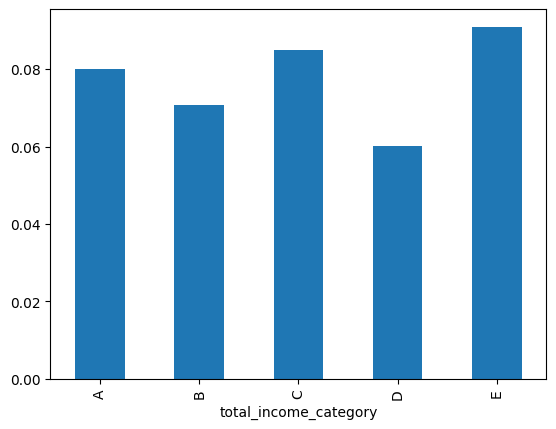

In [31]:
graph_pivot_debt('total_income_category', data)

**Вывод:** Почти все заемщики относятся к категориям 'B' и 'C', случаи просрочки платежей составляют соответственно 7.1% и 8.5%. Количество данных по другим категориям незначительно для формулирования определённых выводов.

#### Как разные цели кредита влияют на его возврат в срок?

In [32]:
make_pivot_debt('purpose_category', data)

,Кол-во заёмщиков,Доля должников,Кол-во должников
purpose_category,,,
операции с автомобилем,4279,0.093480,400
операции с недвижимостью,10751,0.072551,780
получение образования,3988,0.092528,369
проведение свадьбы,2313,0.079118,183


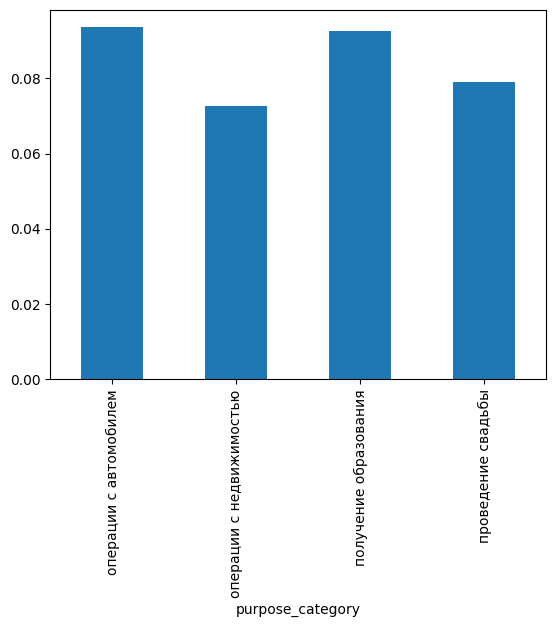

In [33]:
graph_pivot_debt('purpose_category', data)

**Вывод:** по кредитам на операции с автомобилем и на получение образования наблюдается большее количество просрочек, чем по кредитам на операции с недвижимостью и на проведение свадьбы.

#### Возможные причины появления пропусков в исходных данных.

Пропуски в данных о трудовом стаже и уровне заработка могли возникнуть из-за нежелания клиентов раскрывать реальные значения этих цифр, либо в случае системной ошибки при сборе данных. Отрицательные значение в трудовом стаже могли появиться, например, из-за того, что данные о нём указывались через тире (-), и таким образом неправильно интерпретировались как знак "-" перед числом.

#### Почему заполнение пропуски медианным значением — лучшее решение для количественных переменных.

Медианное значение лучше подходит для заполнения пропущенных значений, т.к. меньше зависит от экстремальных значений. Несмотря на то, что мы сгруппировали данные о клиентах по типу занятости, даже внутри этих групп могут уровни дохода и длительность трудового стажа могут сильно отличаться, поэтому использование среднего значения может сильно исказить имеющиеся данные.

### Общий вывод.

In [34]:
print('Доля должников во всей выборке - ', '{:.1%}'.format(data['debt'].mean()))
print('Доля должников в "лучшей" выборке - ', '{:.1%}'.format(data.loc[(data['children'] == 0) & 
               (data['family_status'] == 'вдовец / вдова') & 
               (data['total_income_category'] == 'B')]['debt'].mean()))

Доля должников во всей выборке -  8.1%
Доля должников в "лучшей" выборке -  5.4%


В данном проекте была проведена работа по подготовке данных к анализу и сделаны первые предварительные выводы в рамках поставленной задачи.
1. В половине случаев клиенты обращаются за займами на операции с недвижимостью, причём доля должников в этой группе самая маленькая - 7,1%.
1. Более половины заёмщиков состоят в официально браке, доля должников в этой группе так же одна из самых небольших - 7.6% и уступает только категории "вдовец/вдова".
1. За кредитами в основном обращаются люди с доходом от 50 тыс. до 1 млн рублей, причём люди с бОльшим доходом реже становятся должниками.
1. Типичный заёмщик - это бездетный, состоящий в браке гражданин с доходом от 50 до 200 тыс. рублей.
1. "Лучший заёмщик" - это бездетный вдовец/вдова с доходом от 200 тыс. до 1 млн рублей. Таких заёмщиков всего 130, но доля должников среди них всего 5,4%, в то время как доля должников во всей выборке 8,1%. 

Несмотря на конкретные указания по работе с неполными данными, могут быть предложены другие подходы для более детального изучения имеющейся информации, например:
* отрицательные значения в трудовом стаже могли возникнуть из-за символа "тире" в исходных данных или же в следствии того, что данные расчитывались арифметически и были допущены ошибки. В случае, если таких данных достаточное количество, необходимо сравнить как данные с отрицательными значениями отличаются от общей выборки.
* аномальные значения для количества детей могли возникнуть из-за неправильной обработки данных (наример: "тире" было распознано как минус, 2.0 как 20), при значимом количестве таких аномалий также нужно было бы уделить больше времени этим данным.
* пропуски в данных о трудовом стаже и уровне заработка могли возникнуть из-за умышленного сокрытия клиентами личной информации, доля таких данных порядка 10%, поэтому их можно отдельно сравнить с общей выборкой и сделать вывод, влияют ли пропуски в данных на возврат кредита в срок.
